## Calculations and plots for blog post 

### Ryzen 7000 HPL HPCG NAMD Gromacs Lammps NWChem WRF openFOAM 

### Ryzen 7950x Zen4 AVX512 Performance With AMD AOCCv4 HPL HPCG HPL-MxP

These are typical imports for almost any data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
#sns.set() # not using seaborn but this makes the plots look better
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go


## HPL Linpack Performance

In [2]:
dfhpl = pd.DataFrame({'CPU':[
    'Tr Pro 5995WX',
    'Ryzen 7950X Zen4 opt',
    'Ryzen 7950X Zen3 opt-1',
    'Ryzen 7950X Zen3 opt-2',
    'Ryzen 5950X'
     ], 
    'GFLOP/s':[1856,1011,916,847,695]})
dfhpl



,CPU,GFLOP/s
0,Tr Pro 5995WX,1856
1,Ryzen 7950X Zen4 opt,1011
2,Ryzen 7950X Zen3 opt-1,916
3,Ryzen 7950X Zen3 opt-2,847
4,Ryzen 5950X,695


In [33]:
def plot_bar(x,y,title,perf_unit,xtitle):
    fig = go.Figure()


    p_blue='#163AD6'
    p_green='#08CC96'
    p_lblue='#3E7AFF'
    colors=[p_blue,p_green,p_lblue,p_blue,p_blue]
    
    marker_color=colors

    fig.add_trace( go.Bar(
        x=x, y=y, orientation='h',
        text=x, textposition="auto",
        marker_color=colors,
        #width=.4
                )
    )

    fig.update_layout(
        title=dict(
            text=f"{title}{perf_unit}" ,
            x=0.5,y=0.90,
            xanchor='center',
            yanchor='top',
            font=dict(size=20),
            font_family="Poppins",
        ),
        bargap=0.35,
        font_family="Roboto",
        font_size=10.5,
        xaxis=dict(title=xtitle),
        #yaxis={'catagoryorder':'title:assending'},
        yaxis={'categoryorder':'array', 'categoryarray':[ 'Ryzen 5950X','Ryzen 7950X Zen3 opt-2','Ryzen 7950X Zen3 opt-1','Ryzen 7950X Zen4 opt','Tr Pro 5995WX']},
        template="plotly_white",

        autosize=True,
        width=800,
        height=520,

    )

    fig.add_layout_image(
        dict(
            source="./PugetSystems_Logo_RGB_1.resized.png",
            xref="paper", yref="paper",
            x=-0.5, y=-0.1,
            sizex=0.35, sizey=0.35,
            xanchor="center", yanchor="top"
            )
    )

    fig.show()

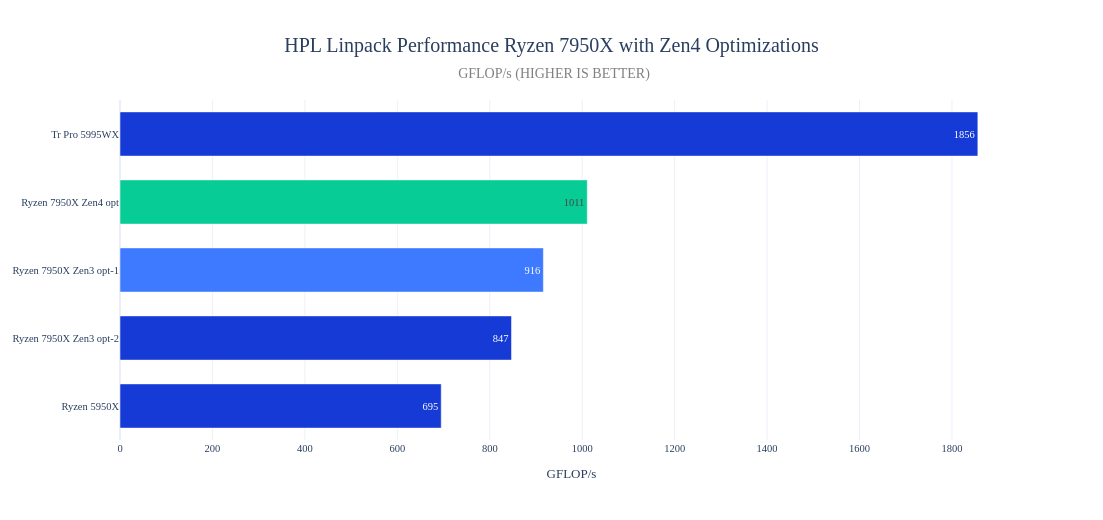

In [34]:
title="HPL Linpack Performance Ryzen 7950X with Zen4 Optimizations"
perf_unit="<br> <span style='color:grey;font-size: 14px'>GFLOP/s (HIGHER IS BETTER)</span>"
xtitle="GFLOP/s"

x = dfhpl["GFLOP/s"]
y = dfhpl["CPU"]

plot_bar(x,y,title,perf_unit,xtitle)

## HPCG Performance

In [19]:
dfhpcg = pd.DataFrame({'CPU':[
    'Tr Pro 5995WX',
    'Ryzen 7950X Zen4',
    'Ryzen 7950X Zen3',
    'Ryzen 5950X'
     ], 
    'GFLOP/s':[19.0,10.53,7.46,5.76]})
dfhpcg

,CPU,GFLOP/s
0,Tr Pro 5995WX,19.00
1,Ryzen 7950X Zen4,10.53
2,Ryzen 7950X Zen3,7.46
3,Ryzen 5950X,5.76


In [46]:
def plot_bar(x,y,title,perf_unit,xtitle):
    fig = go.Figure()


    p_blue='#163AD6'
    p_green='#08CC96'
    p_lblue='#3E7AFF'
    colors=[p_blue,p_green,p_blue,p_blue]
    
    marker_color=colors

    fig.add_trace( go.Bar(
        x=x, y=y, orientation='h',
        text=x, textposition="auto",
        marker_color=colors,
        #width=.4
                )
    )

    fig.update_layout(
        title=dict(
            text=f"{title}{perf_unit}" ,
            x=0.5,y=0.90,
            xanchor='center',
            yanchor='top',
            font=dict(size=20),
            font_family="Poppins",
        ),
        bargap=0.35,
        font_family="Roboto",
        font_size=10.5,
        xaxis=dict(title=xtitle),
        #yaxis={'catagoryorder':'title:assending'},
        yaxis={'categoryorder':'array', 'categoryarray':[ 'Ryzen 5950X','Ryzen 7950X Zen3','Ryzen 7950X Zen4','Tr Pro 5995WX']},
        template="plotly_white",

        autosize=True,
        width=800,
        height=440,

    )

    fig.add_layout_image(
        dict(
            source="./PugetSystems_Logo_RGB_1.resized.png",
            xref="paper", yref="paper",
            x=0.5, y=-.20,
            sizex=0.35, sizey=0.35,
            xanchor="center", yanchor="top"
            )
    )

    fig.show()

In [48]:
title="HPCG (memory-bound) Performance Ryzen 7950X with Zen4 Optimizations"
perf_unit="<br> <span style='color:grey;font-size: 14px'>GFLOP/s (HIGHER IS BETTER)</span>"
xtitle="GFLOP/s"

x = dfhpcg["GFLOP/s"]
y = dfhpcg["CPU"]

plot_bar(x,y,title,perf_unit,xtitle)

## HPL-MxP

In [51]:
dfhplmxp = pd.DataFrame({'CPU':[
    'Ryzen 7950X Zen4',
     ], 
    'GFLOP/s':[3975]})
dfhplmxp

,CPU,GFLOP/s
0,Ryzen 7950X Zen4,3975


In [71]:
def plot_bar(x,y,title,perf_unit,xtitle):
    fig = go.Figure()


    #p_blue='#163AD6'
    p_green='#08CC96'
    #p_lblue='#3E7AFF'
    colors=[p_green]
    
    marker_color=colors

    fig.add_trace( go.Bar(
        x=x, y=y, orientation='h',
        text=x, textposition="auto",
        marker_color=colors,
        #width=.4
                )
    )

    fig.update_layout(
        title=dict(
            text=f"{title}{perf_unit}" ,
            x=0.5,y=0.90,
            xanchor='center',
            yanchor='top',
            font=dict(size=20),
            font_family="Poppins",
        ),
        bargap=0.35,
        font_family="Roboto",
        font_size=10.5,
        xaxis=dict(title=xtitle),
        #yaxis={'catagoryorder':'title:assending'},
        yaxis={'categoryorder':'array', 'categoryarray':[ 'Ryzen 5950X','Ryzen 7950X Zen3','Ryzen 7950X Zen4','Tr Pro 5995WX']},
        template="plotly_white",

        autosize=True,
        width=800,
        height=240,

    )

    fig.add_layout_image(
        dict(
            source="./PugetSystems_Logo_RGB_1.resized.png",
            xref="paper", yref="paper",
            x=0.5, y=-.75,
            sizex=0.35, sizey=0.35,
            xanchor="center", yanchor="top"
            )
    )

    fig.show()

In [72]:
title="HPL-MxP (mixed precision) Performance Ryzen 7950X with Zen4 Optimizations"
perf_unit="<br> <span style='color:grey;font-size: 14px'>GFLOP/s (HIGHER IS BETTER)</span>"
xtitle="GFLOP/s"

x = dfhplmxp["GFLOP/s"]
y = dfhplmxp["CPU"]

plot_bar(x,y,title,perf_unit,xtitle)

## NAMD

In [37]:
dfnamd = pd.DataFrame({
    'Simulations':['ApoA1','F1ATPase','STMV'],
    'Tr Pro 5995WX':[0.081,0.241,1.137],
    'Ryzen 7950X':[0.166,0.526,2.289],
    'Ryzen 5950X':[0.235,0.742,3.215]
})

title="NAMD, (Tr Pro 5995WX, Ryzen 7950X, Ryzen 5950X)"
perf_unit="<br> <span style='color:grey;font-size: 14px'>day/ns (LOWER IS BETTER)</span>"

xtitle="Simulations"
ytitle="day/ns"

p_blue='#163AD6'
p_green='#08CC96'
p_lblue='#3E7AFF'

x=dfnamd['Simulations']
y1=dfnamd['Tr Pro 5995WX']
y2=dfnamd['Ryzen 7950X']
y3=dfnamd['Ryzen 5950X']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x,
    y=y1,
    name='Tr Pro 5995WX',
    text=y1, textposition="auto",
    marker_color=p_blue
))
fig.add_trace(go.Bar(
    x=x,
    y=y2,
    name='Ryzen 7950X',
    text=y2, textposition="auto",
    marker_color=p_green
))
fig.add_trace(go.Bar(
    x=x,
    y=y3,
    name='Ryzen 5950X',
    text=y3, textposition="auto",
    marker_color=p_lblue
))

fig.update_layout(
    title=dict(
        text=f"{title}{perf_unit}" ,
        x=0.5,y=0.90,
        xanchor='center',
        yanchor='top',
        font=dict(size=20),
        font_family="Poppins",
    ),
        bargap=0.30,
        font_family="Roboto",
        font_size=10.5,
        xaxis=dict(title=xtitle),
        yaxis=dict(title=ytitle),
        template="plotly_white",
        autosize=True,
        width=800,
        height=440,

    )

fig.add_layout_image(
    dict(
        source="./PugetSystems_Logo_RGB_1.resized.png",
        xref="paper", yref="paper",
        x=0.5, y=-.20,
        sizex=0.35, sizey=0.35,
        xanchor="center", yanchor="top"
        )
)

## GROMACS

In [38]:
dfgmx = pd.DataFrame({
    'Simulations':['MEM','RIB','PEP'],
    'Tr Pro 5995WX':[126.2,7.222,0.553],
    'Ryzen 7950X':[66.0,3.500,0.389],
    'Ryzen 5950X':[33.0,1.800,0.215]
})

title="GROMACS, (Tr Pro 5995WX, Ryzen 7950X, Ryzen 5950X)"
perf_unit="<br> <span style='color:grey;font-size: 14px'>day/ns (HIGHER IS BETTER)</span>"

xtitle="Simulations"
ytitle="ns/day"

p_blue='#163AD6'
p_green='#08CC96'
p_lblue='#3E7AFF'

x=dfgmx['Simulations']
y1=dfgmx['Tr Pro 5995WX']
y2=dfgmx['Ryzen 7950X']
y3=dfgmx['Ryzen 5950X']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x,
    y=y1,
    name='Tr Pro 5995WX',
    text=y1, textposition="auto",
    marker_color=p_blue
))
fig.add_trace(go.Bar(
    x=x,
    y=y2,
    name='Ryzen 7950X',
    text=y2, textposition="auto",
    marker_color=p_green
))
fig.add_trace(go.Bar(
    x=x,
    y=y3,
    name='Ryzen 5950X',
    text=y3, textposition="auto",
    marker_color=p_lblue
))

fig.update_layout(
    title=dict(
        text=f"{title}{perf_unit}" ,
        x=0.5,y=0.90,
        xanchor='center',
        yanchor='top',
        font=dict(size=20),
        font_family="Poppins",
    ),
        bargap=0.30,
        font_family="Roboto",
        font_size=10.5,
        xaxis=dict(title=xtitle),
        yaxis=dict(title=ytitle),
        template="plotly_white",
        autosize=True,
        width=800,
        height=440,

    )

fig.add_layout_image(
    dict(
        source="./PugetSystems_Logo_RGB_1.resized.png",
        xref="paper", yref="paper",
        x=0.5, y=-.20,
        sizex=0.35, sizey=0.35,
        xanchor="center", yanchor="top"
        )
)

## LAMMPS

In [39]:
dflammps = pd.DataFrame({
    'Simulations':['rhodo','Cu_3u','lj'],
    'Tr Pro 5995WX':[5.011,3.086,1.835],
    'Ryzen 7950X':[2.287,1.443,0.968],
    'Ryzen 5950X':[1.586,1.060,0.679]
})

title="LAMMPS, (Tr Pro 5995WX, Ryzen 7950X, Ryzen 5950X)"
perf_unit="<br> <span style='color:grey;font-size: 14px'>timesteps/s (HIGHER IS BETTER)</span>"

xtitle="Simulations"
ytitle="timesteps/s"

p_blue='#163AD6'
p_green='#08CC96'
p_lblue='#3E7AFF'

x=dflammps['Simulations']
y1=dflammps['Tr Pro 5995WX']
y2=dflammps['Ryzen 7950X']
y3=dflammps['Ryzen 5950X']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x,
    y=y1,
    name='Tr Pro 5995WX',
    text=y1, textposition="auto",
    marker_color=p_blue
))
fig.add_trace(go.Bar(
    x=x,
    y=y2,
    name='Ryzen 7950X',
    text=y2, textposition="auto",
    marker_color=p_green
))
fig.add_trace(go.Bar(
    x=x,
    y=y3,
    name='Ryzen 5950X',
    text=y3, textposition="auto",
    marker_color=p_lblue
))

fig.update_layout(
    title=dict(
        text=f"{title}{perf_unit}" ,
        x=0.5,y=0.90,
        xanchor='center',
        yanchor='top',
        font=dict(size=20),
        font_family="Poppins",
    ),
        bargap=0.30,
        font_family="Roboto",
        font_size=10.5,
        xaxis=dict(title=xtitle),
        yaxis=dict(title=ytitle),
        template="plotly_white",
        autosize=True,
        width=800,
        height=440,

    )

fig.add_layout_image(
    dict(
        source="./PugetSystems_Logo_RGB_1.resized.png",
        xref="paper", yref="paper",
        x=0.5, y=-.20,
        sizex=0.35, sizey=0.35,
        xanchor="center", yanchor="top"
        )
)

## NWChem

In [40]:
dfnwc = pd.DataFrame({'CPU':[
    'Tr Pro 5995WX',
    'Ryzen 7950X',
    'Ryzen 5950X'
     ], 
    'seconds':[525.4,1245.0,1669.5]})
dfnwc

,CPU,seconds
0,Tr Pro 5995WX,525.4
1,Ryzen 7950X,1245.0
2,Ryzen 5950X,1669.5


In [56]:
title="NWChem (C240 631g)Performance Tr Pro 5995WX, Ryzen 7950X, Ryzen 5950X"
perf_unit="<br> <span style='color:grey;font-size: 14px'>seconds (LOWER IS BETTER)</span>"
xtitle="seconds"

x = dfnwc["seconds"]
y = dfnwc["CPU"]

plot_bar(x,y,title,perf_unit,xtitle)

## OpenFOAM

In [42]:
dfof = pd.DataFrame({'CPU':[
    'Tr Pro 5995WX',
    'Ryzen 7950X',
    'Ryzen 5950X'
     ], 
    'seconds':[39.5,126.06,182.25]})
dfof

,CPU,seconds
0,Tr Pro 5995WX,39.50
1,Ryzen 7950X,126.06
2,Ryzen 5950X,182.25


In [57]:
title="OpenFOAM (Motorbike) Performance Tr Pro 5995WX, Ryzen 7950X, Ryzen 5950X"
perf_unit="<br> <span style='color:grey;font-size: 14px'>seconds (LOWER IS BETTER)</span>"
xtitle="seconds"

x = dfof["seconds"]
y = dfof["CPU"]

plot_bar(x,y,title,perf_unit,xtitle)

## WRF

In [47]:
dfwrf = pd.DataFrame({'CPU':[
    'Tr Pro 5995WX',
    'Ryzen 7950X',
    'Ryzen 5950X'
     ], 
    'minutes':[12.5,25,35]})
dfwrf

,CPU,minutes
0,Tr Pro 5995WX,12.5
1,Ryzen 7950X,25.0
2,Ryzen 5950X,35.0


In [55]:
title="WRF (CONUS 12K) Performance Tr Pro 5995WX, Ryzen 7950X, Ryzen 5950X"
perf_unit="<br> <span style='color:grey;font-size: 14px'>minutes (LOWER IS BETTER)</span>"
xtitle="minutes"

x = dfwrf["minutes"]
y = dfwrf["CPU"]

plot_bar(x,y,title,perf_unit,xtitle)